#Name: Awez Sheikh
#Roll No. 32
#Batch: A2
#Practical 5b: Develop an automated MRI preprocessing system that applies cropping and 2D transformations (rotation, scaling, and shearing) to enhance alignment, remove irrelevant regions, and improve image quality for accurate medical analysis.

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path='/content/biomedimage.png'
img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

In [3]:
_,thresh = cv2.threshold(img,10,255,cv2.THRESH_BINARY)
contours,_ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
x,y,w,h = cv2.boundingRect(max(contours,key=cv2.contourArea))
cropped = img[y:y+h,x:x+w]

In [4]:
h,w = cropped.shape
center=(w//2,h//2)
M_rot = cv2.getRotationMatrix2D(center,10,1.1)
rotated = cv2.warpAffine(cropped,M_rot,(w,h))
M_shear = np.float32([[1,0.2,0],[0.2,1,0]])
sheared = cv2.warpAffine(rotated,M_shear,(w,h))

In [5]:
pts1 = np.float32([[0,0],[w-1,0],[w-1,h-1],[0,h-1]])
pts2 = np.float32([[0,0],[w-1, 100],[w-1,h-1],[0,h-1]])

In [6]:
M_perspective = cv2.getPerspectiveTransform(pts1,pts2)
perspective_transformed = cv2.warpPerspective(sheared,M_perspective,(w,h))

In [7]:
colored=cv2.applyColorMap(cropped,cv2.COLORMAP_JET)

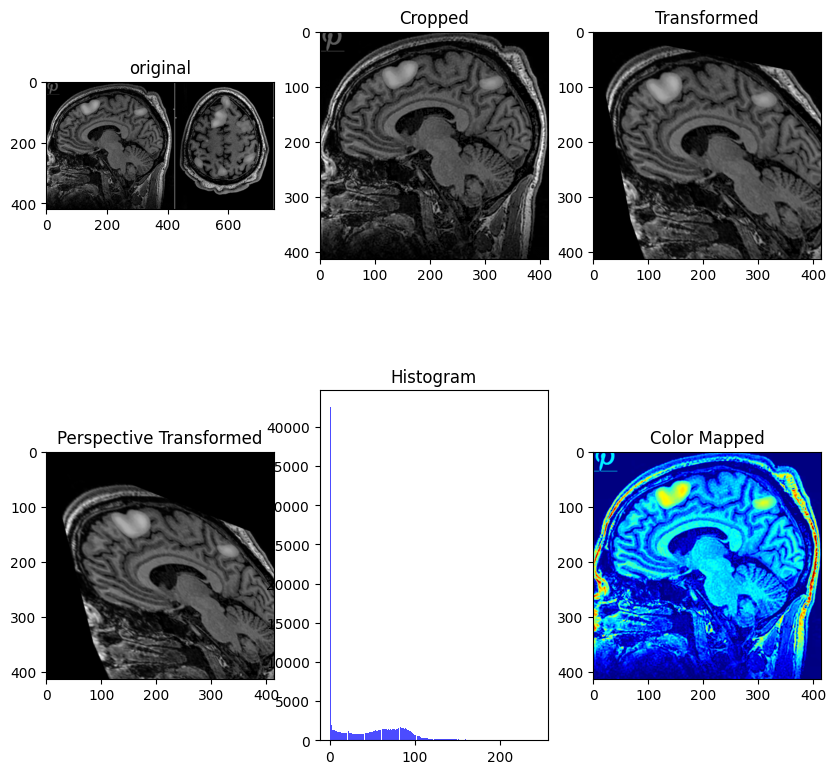

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(2,3,1),plt.imshow(img,cmap='gray'),plt.title('original')
plt.subplot(2,3,2),plt.imshow(cropped,cmap='gray'),plt.title('Cropped')
plt.subplot(2,3,3),plt.imshow(sheared,cmap='gray'),plt.title('Transformed')
plt.subplot(2,3,4),plt.imshow(perspective_transformed,cmap='gray'),plt.title('Perspective Transformed')
plt.subplot(2,3,5),plt.hist(sheared.ravel(),bins=256,color='blue', alpha=0.7),plt.title('Histogram')
plt.subplot(2,3,6),plt.imshow(cv2.cvtColor(colored,cv2.COLOR_BGR2RGB)),plt.title('Color Mapped')
plt.show()